In [1]:
# Import Needed Modules
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Import the files
weather_df = pd.read_csv("Resources/Canton_Ohio_Weather.csv")
cfs_df = pd.read_excel("Resources/cfs_data_Canton.xlsx")
reports_df = pd.read_excel("Resources/reported_crime.xlsx")

In [2]:
# Clean and keep: Calls for Service Data
# Columns to keep: CallType, CreateDatetime
# Create relation column for weather if needed
cfs_df = cfs_df[['CallType','CreateDatetime']]
cfs_df['relation'] = cfs_df['CreateDatetime'].dt.strftime("%Y-%m-%d %H:00:00")

cfs_df.head()

,CallType,CreateDatetime,relation
0,Disturbance,2023-12-22 21:09:34.750,2023-12-22 21:00:00
1,911 Hangup,2023-12-22 21:04:17.120,2023-12-22 21:00:00
2,911 Hangup,2023-12-22 20:44:22.477,2023-12-22 20:00:00
3,911 Hangup,2023-12-22 20:41:46.953,2023-12-22 20:00:00
4,Theft,2023-12-22 20:27:56.443,2023-12-22 20:00:00


In [3]:
# Clean and keep: Reported Crime
# Columns to keep: dordate, tor, offense, QOL_category, crimetype, crimeagainst, day_of_week
reports_df = reports_df[['dordate','tor', 'ti1', 'offense', 'QOL_category', 'crimetype', 'crimeagainst', 'day_of_week']]

# Rename columns
reports_df = reports_df.rename(columns={'dordate':'Report Date','tor':'Report Time','ti1':'Incident Time'})

# Keep only rows that have a full time of report time
reports_df = reports_df.loc[reports_df['Report Time'].str.len() >=8]

# Combine Date and time for relation column for weather if needed
reports_df['relation'] = reports_df['Report Date'] + pd.to_timedelta(reports_df['Report Time'])
reports_df['relation'] = reports_df['relation'].dt.strftime("%Y-%m-%d %H:00:00")

In [4]:
reports_df.head()

,Report Date,Report Time,Incident Time,offense,QOL_category,crimetype,crimeagainst,day_of_week,relation
0,2024-01-02,17:04:10,16:55:00,MENACING,Menacing,Violent,Person,Tuesday,2024-01-02 17:00:00
1,2024-01-02,09:40:00,17:00:00,BURGLARY,Burglary,Property,Property,Tuesday,2024-01-02 09:00:00
2,2024-01-02,14:28:13,14:15:00,REPORT REQUIRED ON LOST/STOLEN FIREARM,Weapons Violations,Society,Society,Tuesday,2024-01-02 14:00:00
3,2024-01-02,02:55:24,02:30:00,CRIMINAL DAMAGING / ENDANGERING,Damaging,Property,Property,Tuesday,2024-01-02 02:00:00
4,2024-01-02,07:36:33,07:26:00,VANDALISM,Damaging,Property,Property,Tuesday,2024-01-02 07:00:00


In [31]:
# Create a dataframe for offense and report date
offense_df = reports_df[['offense','Report Date']]
offense_df = offense_df.groupby('Report Date').count()
display(offense_df.head())
display(offense_df.tail())

,offense
Report Date,
2019-01-03,44
2019-01-04,56
2019-01-05,47
2019-01-06,38
2019-01-07,46


,offense
Report Date,
2023-12-29,47
2023-12-30,43
2023-12-31,30
2024-01-01,63
2024-01-02,51


<Axes: title={'center': 'Number of Offenses froom 2019-2024'}, xlabel='Report Date', ylabel='Number of Offenses'>

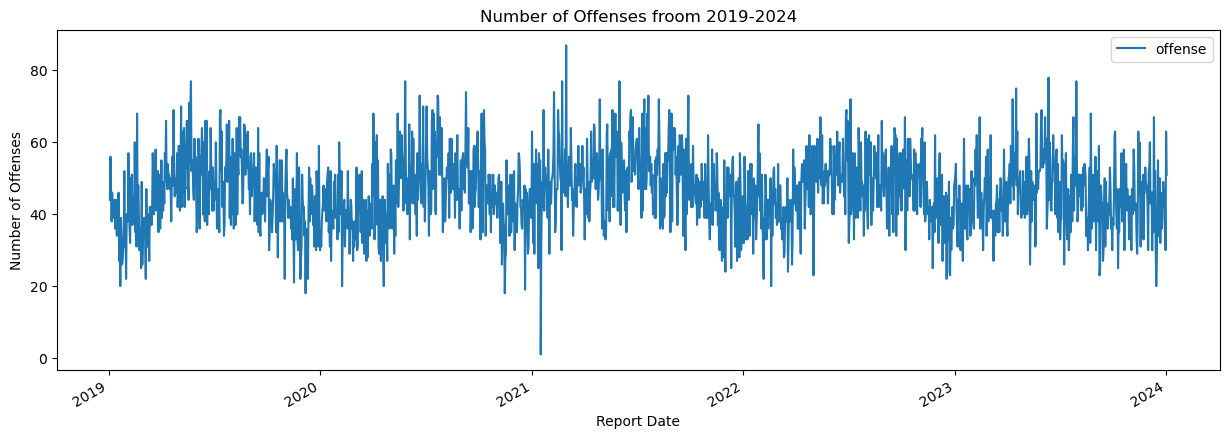

In [33]:
offense_df.plot(ylabel='Number of Offenses', title='Number of Offenses froom 2019-2024', figsize=(15,5))

In [7]:
# Daily offense df
offense_days_df = reports_df[['offense','day_of_week']]
offense_days_df.head()

,offense,day_of_week
0,MENACING,Tuesday
1,BURGLARY,Tuesday
2,REPORT REQUIRED ON LOST/STOLEN FIREARM,Tuesday
3,CRIMINAL DAMAGING / ENDANGERING,Tuesday
4,VANDALISM,Tuesday


In [8]:
# Reset Index
offense_days_df.set_index('day_of_week', inplace=True)
offense_days_df.head()

,offense
day_of_week,
Tuesday,MENACING
Tuesday,BURGLARY
Tuesday,REPORT REQUIRED ON LOST/STOLEN FIREARM
Tuesday,CRIMINAL DAMAGING / ENDANGERING
Tuesday,VANDALISM


In [9]:
# Group by day of week and count
offense_days_df = offense_days_df.groupby('day_of_week').count()
offense_days_df.head()

,offense
day_of_week,
Friday,12052
Monday,12945
Saturday,11627
Sunday,11565
Thursday,11797


In [10]:
# Correct the order of the days
offense_days_df = offense_days_df.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
offense_days_df

,offense
day_of_week,
Monday,12945
Tuesday,12373
Wednesday,12479
Thursday,11797
Friday,12052
Saturday,11627
Sunday,11565


<Axes: title={'center': 'Number of Offenses by Day of Week'}, xlabel='day_of_week', ylabel='Number of Offenses'>

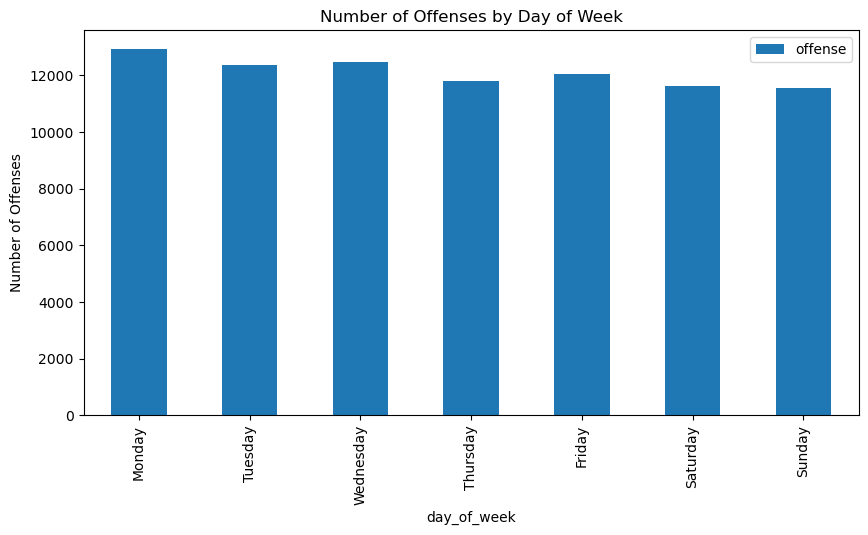

In [28]:
# Plot daily offense
offense_days_df.plot(kind='bar', ylabel='Number of Offenses', 
                     title='Number of Offenses by Day of Week',
                     figsize=(10,5))

In [12]:
# Hourly offense analysis
# Create a dataframe for offense and report date
offense_hour_df = reports_df[['offense','Report Time']]
offense_hour_df['Report Time'] = pd.to_datetime(offense_hour_df['Report Time'])
offense_hour_df.head()

C:\Users\gauer\AppData\Local\Temp\ipykernel_6432\4232673380.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  offense_hour_df['Report Time'] = pd.to_datetime(offense_hour_df['Report Time'])
C:\Users\gauer\AppData\Local\Temp\ipykernel_6432\4232673380.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offense_hour_df['Report Time'] = pd.to_datetime(offense_hour_df['Report Time'])


,offense,Report Time
0,MENACING,2024-01-11 17:04:10
1,BURGLARY,2024-01-11 09:40:00
2,REPORT REQUIRED ON LOST/STOLEN FIREARM,2024-01-11 14:28:13
3,CRIMINAL DAMAGING / ENDANGERING,2024-01-11 02:55:24
4,VANDALISM,2024-01-11 07:36:33


In [13]:
# Group Time of Days
offense_hour_df['Time of Day'] = pd.cut(offense_hour_df['Report Time'].dt.hour, 
                                        bins=[0,6,12,18,24], 
                                        labels=['Early Morning','Morning','Afternoon','Evening'])
offense_hour_df.drop(columns=['Report Time'], inplace=True)
offense_hour_df = offense_hour_df.groupby('Time of Day').count() 
offense_hour_df.head()

C:\Users\gauer\AppData\Local\Temp\ipykernel_6432\1311573224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offense_hour_df['Time of Day'] = pd.cut(offense_hour_df['Report Time'].dt.hour,
C:\Users\gauer\AppData\Local\Temp\ipykernel_6432\1311573224.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offense_hour_df.drop(columns=['Report Time'], inplace=True)


,offense
Time of Day,
Early Morning,10758
Morning,20288
Afternoon,30009
Evening,20581


<Axes: title={'center': 'Number of Offenses by Time of Day'}, xlabel='Time of Day', ylabel='Number of Offenses'>

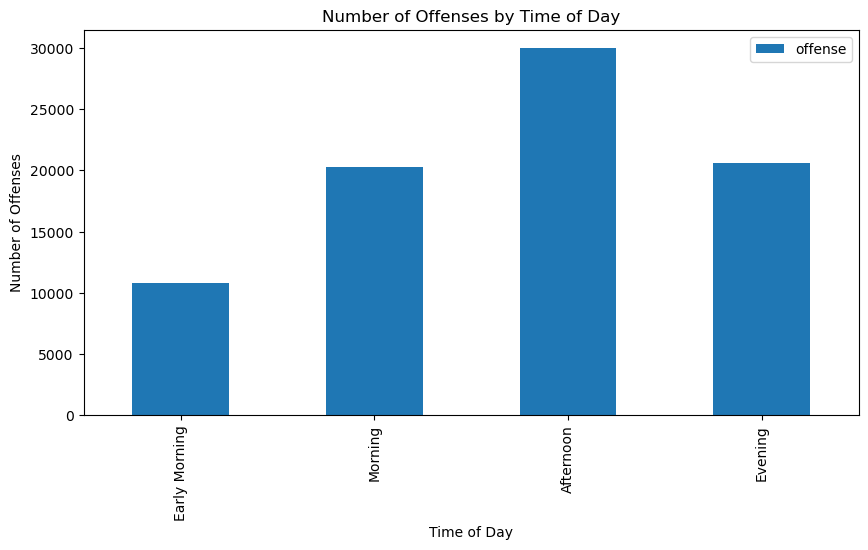

In [34]:
offense_hour_df.plot(kind='bar', ylabel='Number of Offenses', 
                     title='Number of Offenses by Time of Day',
                     figsize=(10,5))


In [15]:
!pip install prophet

In [16]:
# Fit offense data frame for prophet model
offense_df = offense_df.reset_index()
offense_df.head()

,Report Date,offense
0,2019-01-03,44
1,2019-01-04,56
2,2019-01-05,47
3,2019-01-06,38
4,2019-01-07,46


In [17]:
# Continued
m = Prophet()
offense_df.columns = ['ds','y']
offense_df.head()

,ds,y
0,2019-01-03,44
1,2019-01-04,56
2,2019-01-05,47
3,2019-01-06,38
4,2019-01-07,46


In [18]:
#...
m.fit(offense_df)

05:22:56 - cmdstanpy - INFO - Chain [1] start processing
05:22:56 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
# Future Dataframe 
future_trends = m.make_future_dataframe(periods=52, freq='W')
future_trends.tail()

,ds
1874,2024-12-01
1875,2024-12-08
1876,2024-12-15
1877,2024-12-22
1878,2024-12-29


In [20]:
# Making Predictions
offense_forecast = m.predict(future_trends)
offense_forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-03,39.339138,26.973000,51.372164,39.339138,39.339138,-0.164787,-0.164787,-0.164787,5.498652,...,-1.258960,-1.258960,-1.258960,-4.404480,-4.404480,-4.404480,0.0,0.0,0.0,39.174351
1,2019-01-04,39.341972,27.878558,51.859938,39.341972,39.341972,0.905830,0.905830,0.905830,5.498652,...,-0.281940,-0.281940,-0.281940,-4.310882,-4.310882,-4.310882,0.0,0.0,0.0,40.247803
2,2019-01-05,39.344807,27.414201,49.591689,39.344807,39.344807,-0.633608,-0.633608,-0.633608,5.498652,...,-1.913609,-1.913609,-1.913609,-4.218652,-4.218652,-4.218652,0.0,0.0,0.0,38.711199
3,2019-01-06,39.347641,26.486667,49.595188,39.347641,39.347641,-0.777858,-0.777858,-0.777858,5.498652,...,-2.147188,-2.147188,-2.147188,-4.129323,-4.129323,-4.129323,0.0,0.0,0.0,38.569783
4,2019-01-07,39.350476,32.213286,55.251638,39.350476,39.350476,4.593723,4.593723,4.593723,5.498652,...,3.139455,3.139455,3.139455,-4.044385,-4.044385,-4.044385,0.0,0.0,0.0,43.944198


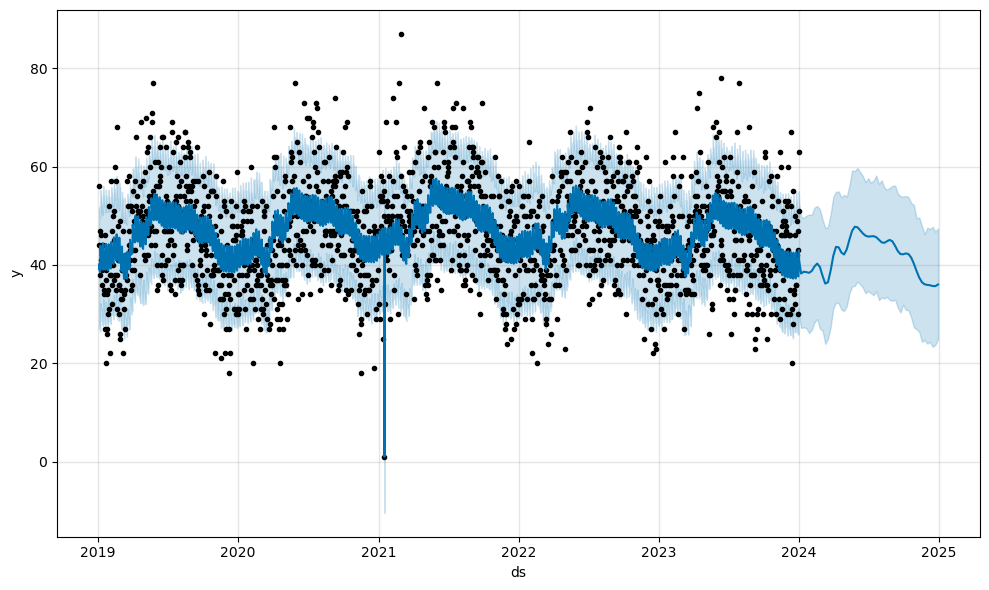

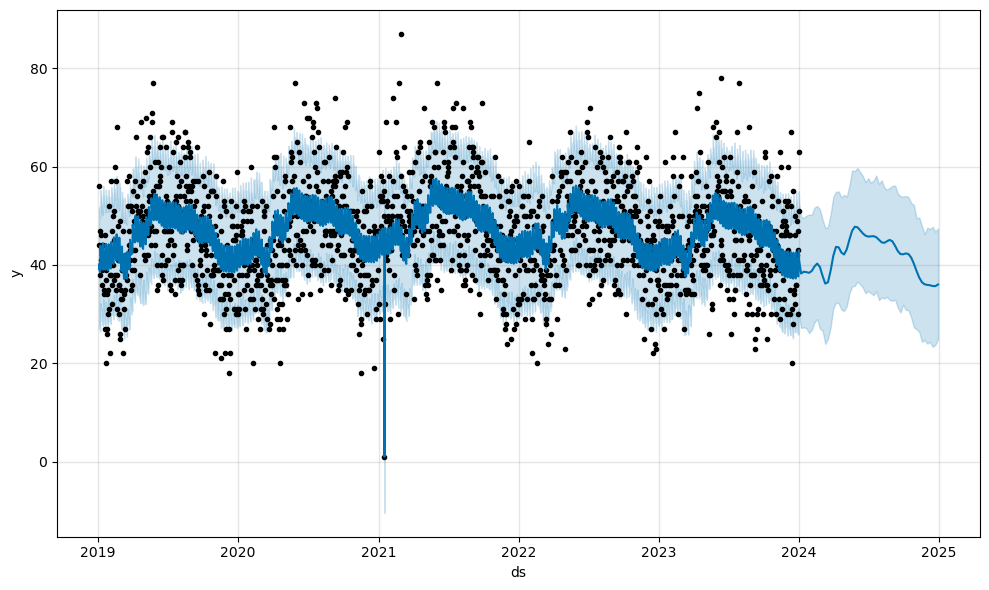

In [21]:
# Plotting the offense predictions
m.plot(offense_forecast)

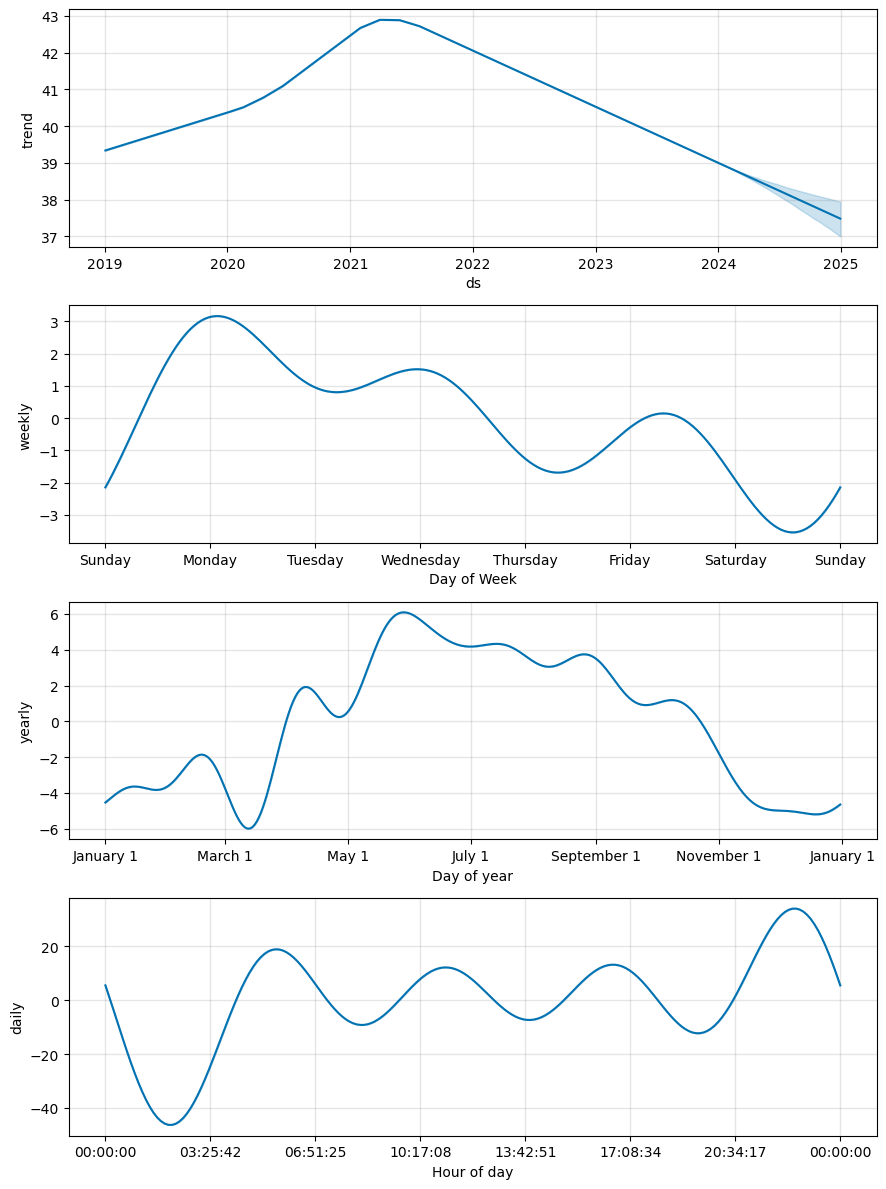

In [22]:
# Plot components to visualize results
offense_fig = m.plot_components(offense_forecast)

<Axes: >

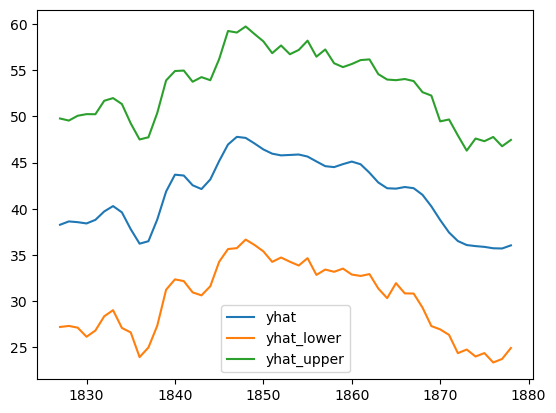

In [23]:
# Plot yhat, yhat_lower, yhat_upper for 2024
offense_forecast[['yhat','yhat_lower','yhat_upper']].iloc[-52:].plot()
